In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

ipl_data_path = '/content/IPL_Ball_by_Ball_2008_2022.csv'

ipl_data = pd.read_csv(ipl_data_path)
ipl_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
batsman_list = ipl_data['batter'].unique()
bowler_list = ipl_data['bowler'].unique()

In [ ]:
len(bowler_list), len(batsman_list)

(472, 605)

In [ ]:
match_path = '/content/IPL_Matches_2008_2022.csv'
match_all = pd.read_csv(match_path)

match_all.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
selected_columns = ['ID', 'Date']
match_data = match_all[selected_columns]



In [ ]:
performance_rn = []
performance_ball = []

for batsman in batsman_list:
  batsman_filtered_df = ipl_data[ipl_data['batter'] == batsman] ## data for that that batter only

  performance_rn_ = []
  performance_ball_ = []
  c = 0
  for bowler in bowler_list:

    bowler_filtered_df = batsman_filtered_df[batsman_filtered_df['bowler'] == bowler]
    performance = []
    total_matches = bowler_filtered_df['ID'].unique()

    for total_match in total_matches:

      one_match_data = bowler_filtered_df[batsman_filtered_df['ID'] == total_match]
      year_factor = (int(list(match_data[match_data['ID'] == total_match]['Date'])[0].split('-')[0])- 2007)/(2023-2007)

      wicket = one_match_data['isWicketDelivery'].unique()
      out = -1
      if 1 in wicket:
        out = 1

      total_run = one_match_data['total_run'].sum()
      balls_played = one_match_data['ballnumber'].count()
      average_score = total_run/balls_played

      performance.append([average_score*6, out, year_factor])

    weihted_performance = [0, 0, 0]
    for i in performance:
      weihted_performance[0] += i[0]*i[2]
      weihted_performance[1] += i[1]*i[2]
      weihted_performance[2] += i[2]

    if weihted_performance[2] != 0:
      performance_rn_.append(weihted_performance[0]/weihted_performance[2])
      performance_ball_.append(weihted_performance[1]/weihted_performance[2])
    else:
      performance_rn_.append(0)
      performance_ball_.append(0)

  performance_rn.append(performance_rn_)
  performance_ball.append(performance_ball_)



In [ ]:
performance_rn = np.array(performance_rn)
performance_ball = np.array(performance_ball)

In [ ]:
def cosine_similarity(user1_ratings, user2_ratings):
    dot_product = np.dot(user1_ratings, user2_ratings)
    magnitude_user1 = np.sqrt(np.dot(user1_ratings, user1_ratings))
    magnitude_user2 = np.sqrt(np.dot(user2_ratings, user2_ratings))
    return dot_product / (magnitude_user1 * magnitude_user2)

def predict_rating(user_ratings, movie_index, similarity_threshold=0.5):
    num_users = user_ratings.shape[0]
    total_similarity = 0
    weighted_sum = 0
    for i in range(num_users):
        if user_ratings[i, movie_index] != 0:
            similarity = cosine_similarity(user_ratings[i], user_ratings[num_users - 1])
            if similarity > similarity_threshold:
                weighted_sum += similarity * user_ratings[i, movie_index]
                total_similarity += similarity
    if total_similarity == 0:
        return 0
    else:
        return weighted_sum / total_similarity

def fill_missing_values(user_ratings, similarity_threshold=0.5):

    new_user_ratings = user_ratings.copy()
    num_users, num_movies = user_ratings.shape
    for i in range(num_users):
        for j in range(num_movies):
            if new_user_ratings[i, j] == 0:
                new_user_ratings[i, j] = predict_rating(new_user_ratings, j, similarity_threshold)
    return new_user_ratings

In [ ]:
performance_rn.shape, performance_ball.shape

((605, 472), (605, 472))

In [ ]:
t1 = match_all['Team1Players'][0]
t2 = match_all['Team2Players'][0]

team1_idx = []
for t in t1[1:-1].split(', '):
    if len(np.where(batsman_list == t[1:-1])[0]) != 0:
      team1_idx.append(np.where(batsman_list == t[1:-1])[0][0])
    else:
      print(t[1:-1])

team2_idx = []
for t in t2[1:-1].split(', '):
    bolwer_idx = np.where(bowler_list == t[1:-1])
    if len(bolwer_idx[0]) != 0:
      team2_idx.append(bolwer_idx[0][0])


In [ ]:
performance_matrix_rn = []
performance_matrix_ball = []

for i in team1_idx:
  performance_matrix_rn_ = []
  performance_matrix_ball_ = []
  for j in team2_idx:
    performance_matrix_rn_.append(performance_rn[i][j])
    performance_matrix_ball_.append(performance_ball[i][j])

  performance_matrix_rn.append(performance_matrix_rn_)
  performance_matrix_ball.append(performance_matrix_ball_)

In [ ]:
performance_matrix_rn = np.array(performance_matrix_rn)
performance_matrix_ball = np.array(performance_matrix_ball)

In [ ]:
performance_matrix_rn.shape, performance_matrix_ball.shape

((11, 7), (11, 7))

In [ ]:
from tabulate import tabulate
print(tabulate(performance_matrix_rn , tablefmt="grid"))
print(tabulate(performance_matrix_ball , tablefmt="grid"))

+---------+---------+----------+---------+----------+---------+----------+
| 0       | 0       | 11       |  0      |  0       |  5.5    |  6.75    |
+---------+---------+----------+---------+----------+---------+----------+
| 8.71154 | 9.42857 |  3.06389 |  6      | 12.75    | 13.0909 | 10.507   |
+---------+---------+----------+---------+----------+---------+----------+
| 8.42857 | 7.23077 |  6.18921 | 10.2857 |  6       | 10      | 13.3548  |
+---------+---------+----------+---------+----------+---------+----------+
| 1.92857 | 9.12684 |  4.5614  | 13.0909 |  8.87805 |  0      |  5.34146 |
+---------+---------+----------+---------+----------+---------+----------+
| 7.12782 | 5.03704 |  4.84375 |  0      |  8.60465 |  6      |  7.89031 |
+---------+---------+----------+---------+----------+---------+----------+
| 4.5     | 0       |  3.82075 |  4      |  1.39286 |  9      |  3.27273 |
+---------+---------+----------+---------+----------+---------+----------+
| 5.44444 | 0       |  5.

In [ ]:
performance_rn_filled = fill_missing_values(performance_matrix_rn)
performance_ball_filled = fill_missing_values(performance_matrix_ball)
print(tabulate(performance_rn_filled , tablefmt="grid"))
#print(tabulate(performance_ball_filled , tablefmt="grid"))

+---------+---------+----------+----------+----------+----------+----------+
| 6.58551 | 7.23187 | 11       |  6.36838 |  5.89024 |  5.5     |  6.75    |
+---------+---------+----------+----------+----------+----------+----------+
| 8.71154 | 9.42857 |  3.06389 |  6       | 12.75    | 13.0909  | 10.507   |
+---------+---------+----------+----------+----------+----------+----------+
| 8.42857 | 7.23077 |  6.18921 | 10.2857  |  6       | 10       | 13.3548  |
+---------+---------+----------+----------+----------+----------+----------+
| 1.92857 | 9.12684 |  4.5614  | 13.0909  |  8.87805 |  7.59091 |  5.34146 |
+---------+---------+----------+----------+----------+----------+----------+
| 7.12782 | 5.03704 |  4.84375 |  6.36838 |  8.60465 |  6       |  7.89031 |
+---------+---------+----------+----------+----------+----------+----------+
| 4.5     | 7.27366 |  3.82075 |  4       |  1.39286 |  9       |  3.27273 |
+---------+---------+----------+----------+----------+----------+----------+

In [ ]:
### cosine similarity

def cosine_similarity(matrix):
    dot_product = np.dot(matrix, matrix.T)
    norm = np.linalg.norm(matrix, axis=1)
    similarity = dot_product / np.outer(norm, norm)
    return similarity

similarity_matrix = cosine_similarity(performance_rn_filled)
np.fill_diagonal(similarity_matrix, 0)


In [ ]:
## spectral clustering

daigonal_matrix = np.zeros([similarity_matrix.shape[0], similarity_matrix.shape[1]]).astype(float)
for i in range(similarity_matrix.shape[0]):
  daigonal_matrix_sum = 0
  for j in range(similarity_matrix.shape[1]):
    daigonal_matrix_sum += similarity_matrix[i][j]
  daigonal_matrix[i][i] = daigonal_matrix_sum

laplacian_matrix = daigonal_matrix - similarity_matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

num_ballers = len(performance_matrix_rn[0])
clustering_data = sorted_eigenvectors[:, -num_ballers:]

In [ ]:
clustering_data_cosine = cosine_similarity(clustering_data)

In [ ]:
# soft clustering for data using fuszzy kmeans clustering

import numpy as np

def initialize_membership_matrix(n_samples, n_clusters):
    membership_matrix = np.random.rand(n_clusters, n_samples)
    membership_matrix = membership_matrix / np.sum(membership_matrix, axis=0, keepdims=True)
    return membership_matrix

def update_centers(matrix, membership_matrix, m):
    um = membership_matrix ** m
    centers = np.dot(um, matrix) / np.sum(um, axis=1, keepdims=True)
    return centers

def update_membership_matrix(matrix, centers, m):
    distance_matrix = np.zeros((centers.shape[0], matrix.shape[0]))
    for i, center in enumerate(centers):
        distance_matrix[i] = np.linalg.norm(matrix - center, axis=1)

    distance_matrix = np.fmax(distance_matrix, np.finfo(np.float64).eps)
    inv_distances = 1.0 / distance_matrix
    inv_distances_power = inv_distances ** (2 / (m - 1))
    membership_matrix = inv_distances_power / np.sum(inv_distances_power, axis=0, keepdims=True)
    return membership_matrix

def fuzzy_c_means(matrix, n_clusters, m, error=0.005, maxiter=1000):
    n_samples = matrix.shape[0]
    membership_matrix = initialize_membership_matrix(n_samples, n_clusters)

    for _ in range(maxiter):
        old_membership_matrix = membership_matrix.copy()
        centers = update_centers(matrix, membership_matrix, m)
        membership_matrix = update_membership_matrix(matrix, centers, m)

        if np.linalg.norm(membership_matrix - old_membership_matrix) < error:
            break

    return centers, membership_matrix

# Parameters for fuzzy c-means
n_clusters = num_ballers
m = 2.0

# Perform fuzzy c-means clustering
centers, membership_matrix = fuzzy_c_means(clustering_data_cosine, n_clusters, m)

# Assign each data point to the cluster with the highest membership value
cluster_labels = np.argmax(membership_matrix, axis=0)



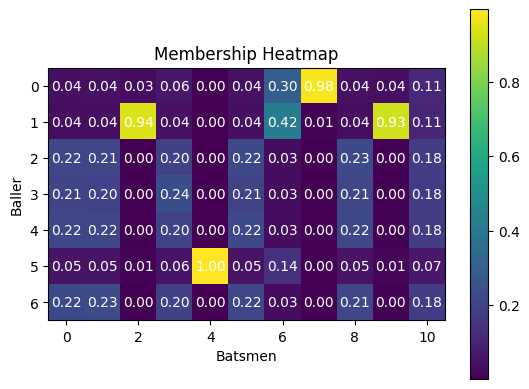

In [ ]:

import matplotlib.pyplot as plt

plt.imshow(membership_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Membership Heatmap')
plt.xlabel('Batsmen')
plt.ylabel('Baller')

for i in range(membership_matrix.shape[0]):
    for j in range(membership_matrix.shape[1]):
        plt.text(j, i, f"{membership_matrix[i, j]:.2f}", ha='center', va='center', color='w')

plt.show()
